In [1]:
import pandas as pd
import numpy as np
from pgmpy.models import BayesianModel
from pgmpy.estimators import HillClimbSearch, BicScore, MaximumLikelihoodEstimator
import networkx as nx
import matplotlib.pyplot as plt

from mechanisms.revised_mechanism.revised_mechanism import *
from utils.bn.bayesian_network import *
from utils.alphabet import *
from utils.normalize_error_matrix import *

/var/folders/g2/95j7qkyn1052qk2729bm18cr0000gn/T/ipykernel_10381/2657466239.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd
/Users/sandarujayawardana/Documents/minimal-data-ldp/.venv/lib/python3.9/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:

data = pd.read_csv('adult.csv') #'list_attr_celeba.txt') #'adult.csv')
# data = pd.read_csv('list_attr_celeba.txt', sep='\s+', engine='python', skiprows=1)

# Preprocessing steps might include encoding categorical variables,
# handling missing values, etc. Here's a simple placeholder for preprocessing.
data = data.replace('?', pd.NA).dropna()
# data.dropna(inplace=True)

priority_dict = {}

In [3]:
data.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


  0%|          | 12/1000000 [00:01<45:29:24,  6.11it/s]


Best model structure:  [('workclass', 'occupation'), ('workclass', 'gender'), ('occupation', 'education'), ('occupation', 'gender'), ('occupation', 'relationship'), ('relationship', 'marital-status'), ('relationship', 'income'), ('relationship', 'race'), ('gender', 'relationship'), ('gender', 'marital-status'), ('race', 'native-country'), ('education', 'income')]
9
9


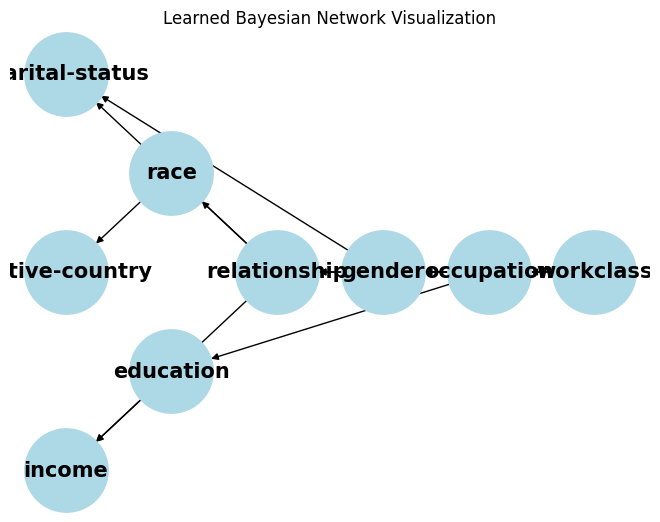

In [4]:
selected_attributes = ['workclass', 'marital-status', 'occupation', 'relationship', 'gender', 'native-country', 'race', "education", "income"] # list(data.columns)[:6]
selected_data = data[selected_attributes]
bn = BN(data=selected_data, priority_dict=priority_dict)
model = bn.get_model()
bn.visualize_structure()

In [5]:
ordered_attribute_list = bn.get_ordered_attribute_list()
print(ordered_attribute_list)
alphabet_dict = get_alphabet_dict_from_data(selected_data)
print(alphabet_dict)
parent_node_dict = bn.get_parent_nodes_dict()
print(parent_node_dict)
revised_mechanism = Revised_Mechanism(data=selected_data, model=model, ordered_attribute_list=ordered_attribute_list, parent_node_dict=parent_node_dict, alphabet_dict=alphabet_dict, priority_dict=priority_dict)

['marital-status', 'native-country', 'income', 'race', 'education', 'relationship', 'gender', 'occupation', 'workclass']
{'workclass': ['Federal-gov', 'Local-gov', 'Private', 'Self-emp-inc', 'Self-emp-not-inc', 'State-gov', 'Without-pay'], 'marital-status': ['Divorced', 'Married-AF-spouse', 'Married-civ-spouse', 'Married-spouse-absent', 'Never-married', 'Separated', 'Widowed'], 'occupation': ['Adm-clerical', 'Armed-Forces', 'Craft-repair', 'Exec-managerial', 'Farming-fishing', 'Handlers-cleaners', 'Machine-op-inspct', 'Other-service', 'Priv-house-serv', 'Prof-specialty', 'Protective-serv', 'Sales', 'Tech-support', 'Transport-moving'], 'relationship': ['Husband', 'Not-in-family', 'Other-relative', 'Own-child', 'Unmarried', 'Wife'], 'gender': ['Female', 'Male'], 'native-country': ['Cambodia', 'Canada', 'China', 'Columbia', 'Cuba', 'Dominican-Republic', 'Ecuador', 'El-Salvador', 'England', 'France', 'Germany', 'Greece', 'Guatemala', 'Haiti', 'Holand-Netherlands', 'Honduras', 'Hong', 'Hung

In [6]:
selected_data.head()

,workclass,marital-status,occupation,relationship,gender,native-country,race,education,income
0,Private,Never-married,Machine-op-inspct,Own-child,Male,United-States,Black,11th,<=50K
1,Private,Married-civ-spouse,Farming-fishing,Husband,Male,United-States,White,HS-grad,<=50K
2,Local-gov,Married-civ-spouse,Protective-serv,Husband,Male,United-States,White,Assoc-acdm,>50K
3,Private,Married-civ-spouse,Machine-op-inspct,Husband,Male,United-States,Black,Some-college,>50K
5,Private,Never-married,Other-service,Not-in-family,Male,United-States,White,10th,<=50K


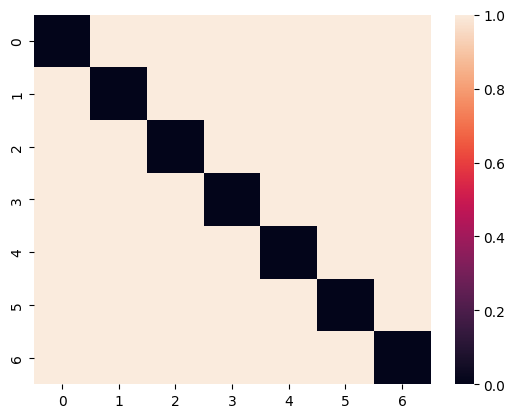

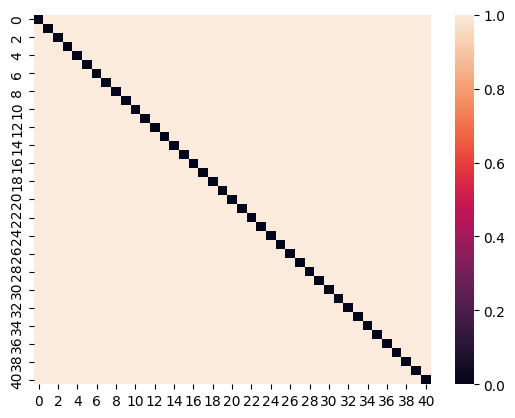

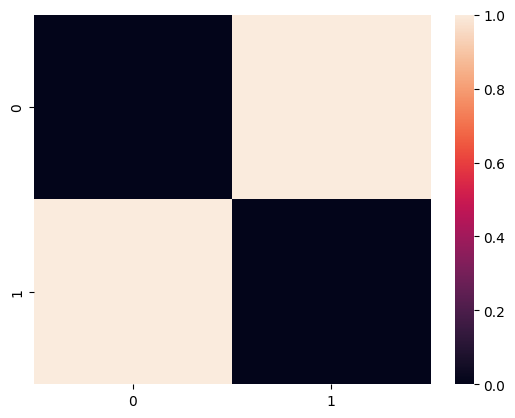

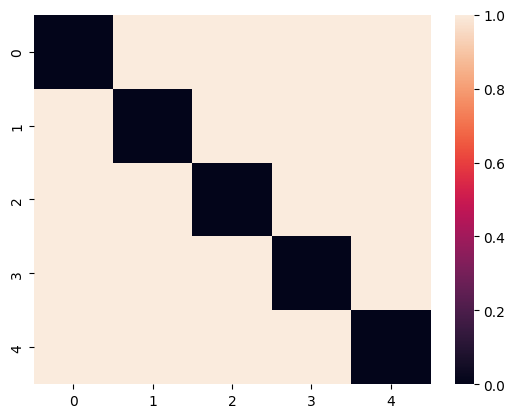

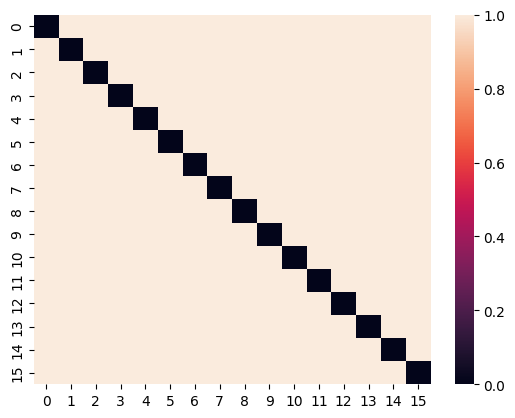

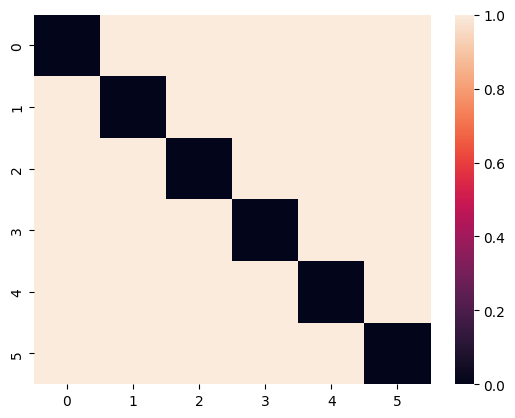

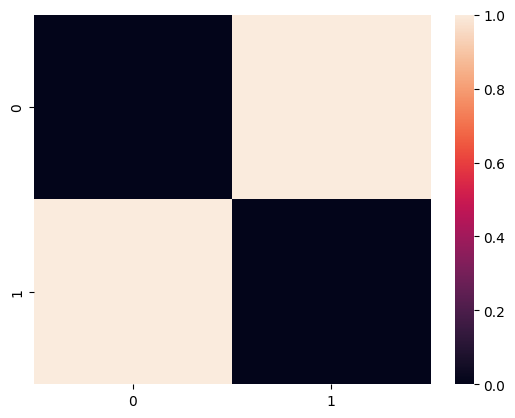

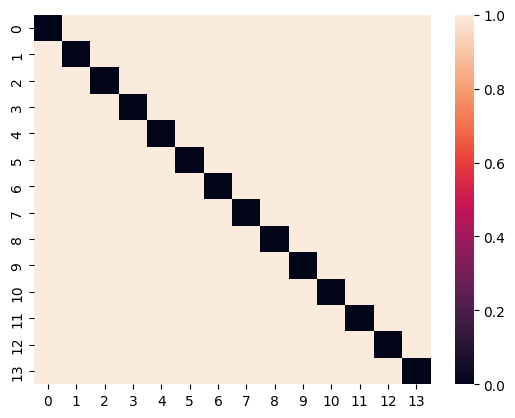

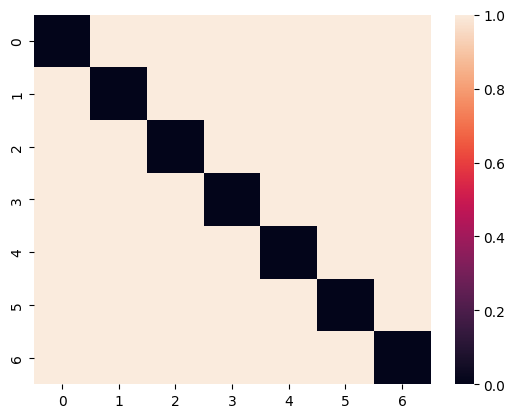

[{'Female Husband ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x293b74a00>,
  'Female Not-in-family ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x293b81eb0>,
  'Female Other-relative ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x293968eb0>,
  'Female Own-child ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x293968310>,
  'Female Unmarried ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x293968ca0>,
  'Female Wife ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x293942dc0>,
  'Male Husband ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x2939429d0>,
  'Male Not-in-family ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x293ba0af0>,
  'Male Other-relative ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x293ba0910>,
  'Male Own-child ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x293b344f0>,
  'Male Unmarried ': <mechanisms.mldp.mldp.Optimized_Randomized_Response at 0x2

In [7]:
revised_mechanism.get_mechanism()

In [8]:
EPS_ARRAY = np.arange(10)*0.8
error_list = []
# ALL_ALPHABET = (create_alphabet(alphabet_dict)).tolist()
# print(len(ALL_ALPHABET), ALL_ALPHABET)
normalize_error_matrix = Normalize_error_matrix(attribute_list=selected_attributes, alphabet=[], priority_dict=priority_dict, alphabet_dict=alphabet_dict, err_type="0_1", skip_error_matrix=True)
datacount = len(selected_data)
for eps in EPS_ARRAY:
    print("eps ", eps)
    __perturbed_value_list = []
    __tot_error = 0
    for index, row in selected_data.iterrows():
        row_as_list = row.tolist()
        # print("eeee")
        actual_value = list_to_string(row_as_list)
        # print("ccc")
        __perturbed_value_list.append(revised_mechanism.gen_random_output(actual_value=actual_value, eps=eps))
        # print("__perturbed_value_list", __perturbed_value_list)
        # print("orig", row_as_list, __perturbed_value_list[-1])
        # print("aaa")
        __error = normalize_error_matrix.get_value_error_temp(actual=row_as_list, perturbed=__perturbed_value_list[-1])
        # print("bbbb")
        __tot_error += __error
    error_list.append(__tot_error/datacount)

plt.plot(EPS_ARRAY, error_list)
# ax2.set_ylabel("Information Leakage (Bits)")
# plt.legend(lagends)
plt.xlabel("Privacy Budget (Epsilon)")
plt.ylabel("Error (Normalized)")
# plt.title(f"{error_cal_type} error between original value and perturbed value for {Attr_list}")
plt.show()


eps  0.0


IndexError: list index out of range